# Confidence Intervals

Up until now, this guide has primarily focused on learning essential functions and syntax for data manipulation, exploration, and description in R. These activities, like data cleaning and exploratory analysis, often serve as initial steps towards the ultimate goal of extracting valuable insights from data through statistical inference or predictive modeling. The following sections of this guide will shift the focus towards methods used to analyze data and the tools available in R to conduct such analyses.

[Statistical inference](https://en.wikipedia.org/wiki/Statistical_inference) involves examining sample data to gain a deeper understanding of the larger population from which the data was collected and to investigate differences between various data samples. In data analysis, we are frequently interested in understanding the characteristics of a vast population, but obtaining data from the entire population can be impractical or impossible. For instance, in the context of U.S. presidential elections, it would be highly valuable to know the political leanings of every eligible voter. However, conducting surveys on the entire voting population is unfeasible. Instead, we can gather data from a representative subset of the population, such as a thousand registered voters, and use that sample data to draw meaningful inferences about the entire population.

## Point Estimates

[Point estimates](https://en.wikipedia.org/wiki/Point_estimation) refer to approximations of population parameters based on sample data. For instance, if we aim to determine the average age of registered voters in the U.S., we could conduct a survey among registered voters and utilize the average age of the survey respondents as a point estimate for the average age of the entire population. The average value obtained from a sample is commonly known as the sample mean.

It's important to note that the sample mean usually differs slightly from the population mean. Several factors contribute to this disparity, such as suboptimal survey design, biased sampling methods, and the inherent randomness when selecting a sample from a larger population. To better understand point estimates, we will create a simulated population with random age data and draw a sample from it to estimate the mean.

In [1]:
set.seed(12)

# Generate a population
population_ages <- c(rexp(1000000,0.015)+18,   
                    rpois(500000,20)+18,
                    rpois(500000,32.5)+18,
                    rpois(500000,45)+18)

population_ages <- ifelse(population_ages<100, 
                          population_ages, population_ages%%100+18)


true_mean <- mean(population_ages)   # Check the population mean

true_mean

[1] 51.21884

In [2]:
set.seed(10)

# Take a sample of 1000 ages
sample_ages <- sample(population_ages, size=1000)  

# Make a point estimate of the mean
sample_mean <- mean(sample_ages)            

sample_mean

# Check difference between estimate and population parameter
sample_mean-true_mean   

[1] 51.18023

[1] -0.0386093

The point estimate from our sample of 1000 individuals slightly overestimates the true population mean by nearly a year; however, it remains quite close. This highlights a significant idea: by sampling a relatively small subset of individuals, we can obtain a reasonably accurate estimate of a larger population.

Another valuable point estimate is the proportion of the population that belongs to a specific category or subgroup. For instance, in polling voters, we might be interested in determining the racial composition of the overall voter base. To estimate this proportion, we can take a sample and calculate the ratio within the sample.

In [3]:
set.seed(12)

 # Generate some dummy demographic data
population_races <- c(rep("white",1000000), 
                      rep("hispanic",500000),
                      rep("black",500000),
                      rep("asian",250000),
                      rep("other",250000))

demographic_sample <- sample(population_races, size=1000)   # Take a sample

# Print the estimated proportion for each
for (race in unique(demographic_sample)){       
    print(paste(race," proportion estimate:"))       
    print(sum(demographic_sample==race)/1000)   
}

[1] "white  proportion estimate:"
[1] 0.385
[1] "hispanic  proportion estimate:"
[1] 0.193
[1] "black  proportion estimate:"
[1] 0.209
[1] "other  proportion estimate:"
[1] 0.116
[1] "asian  proportion estimate:"
[1] 0.097


*Important: When using the unique() function, provide it with a vector as input, and it will yield a new vector containing only the distinct elements by eliminating duplicates.*

## Sampling Distributions and The Central Limit Theorem

Numerous statistical procedures rely on the assumption that data conforms to a normal distribution, benefitting from its symmetrical shape and concentration of data around the mean within a few standard deviations. However, real-world data frequently deviates from a normal distribution, and the distribution of a sample reflects that of the population. Therefore, if a population exhibits a skewed distribution, a sample taken from it is likely to exhibit a similar skewness. To investigate this, we will plot the previously created data and sample and examine their skewness.

[1] 0.6556028

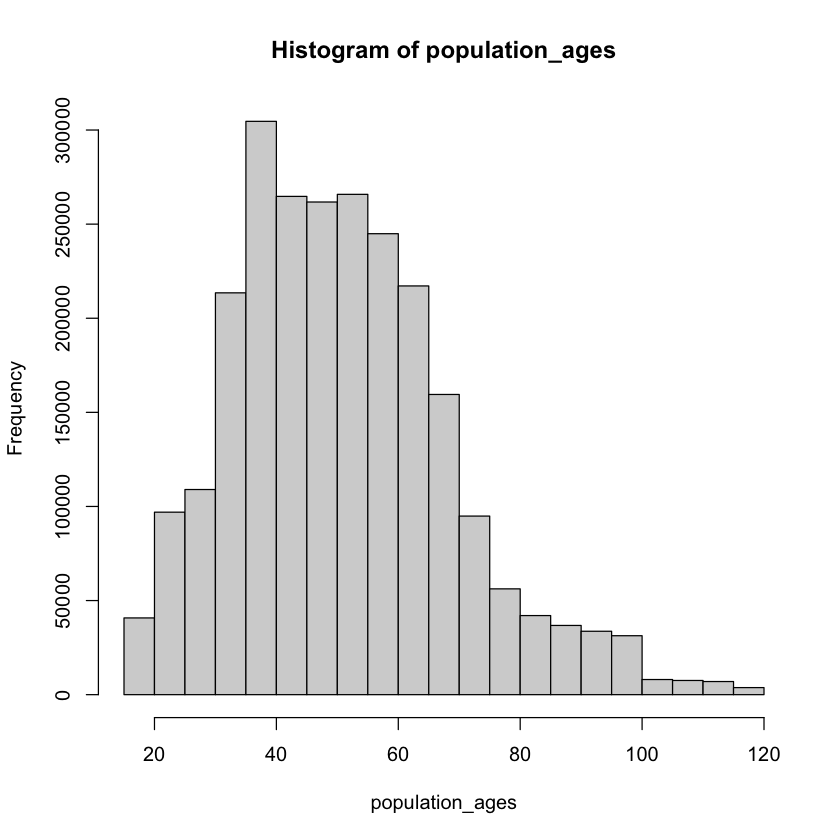

In [4]:
library(e1071)

hist(population_ages, breaks=20)  # Create histogram of population

skewness(population_ages)         # Check the skewness

The histogram displays a distribution that is right-skewed, and this observation is supported by a skewness measurement of 0.6556. When drawing a sample, we expect it to exhibit a similar shape and skewness.

[1] 0.537319

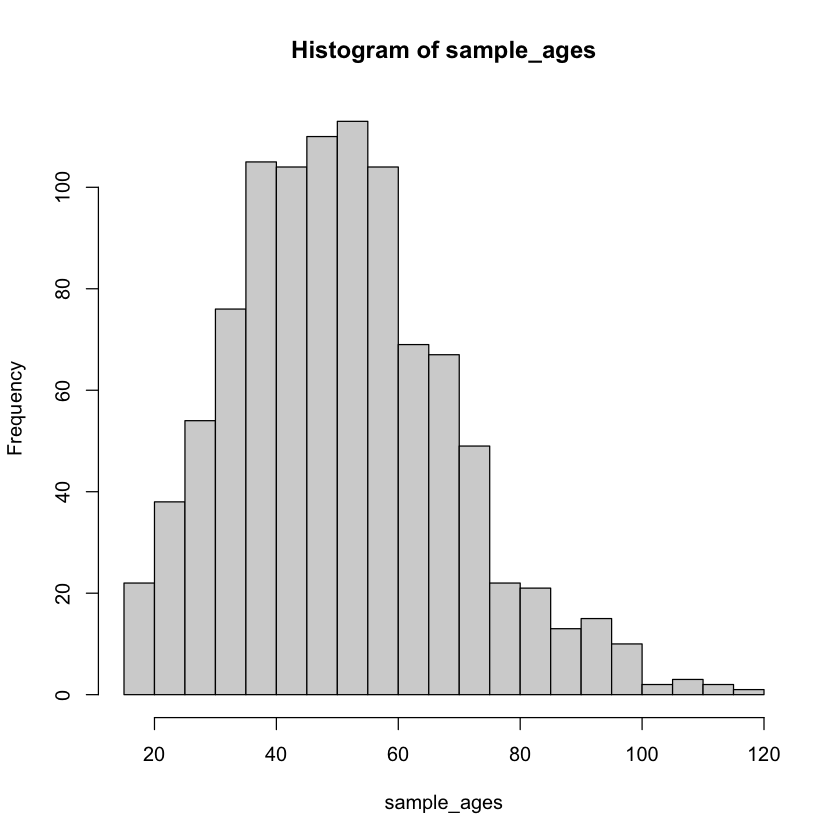

In [5]:
hist(sample_ages, breaks=20)   # Create histogram of the sample

skewness(sample_ages)          # Check the skewness (point estimate of skewness)

The sample displays a similar skewness to the underlying population, indicating that we cannot apply techniques assuming a normal distribution to this dataset. However, thanks to the central limit theorem, we are still able to use such techniques.

The central limit theorem is a fundamental result in probability theory, and it forms the basis of various statistical analysis methods. In essence, the theorem states that the distribution of many sample means, known as a sampling distribution, will be approximately normally distributed. This property remains valid even if the original population distribution is not normal. Consequently, we can treat the sample mean as if it were drawn from a normal distribution.

To demonstrate this, we will generate a sampling distribution by taking 200 samples from our population and then calculating 200 point estimates of the mean.

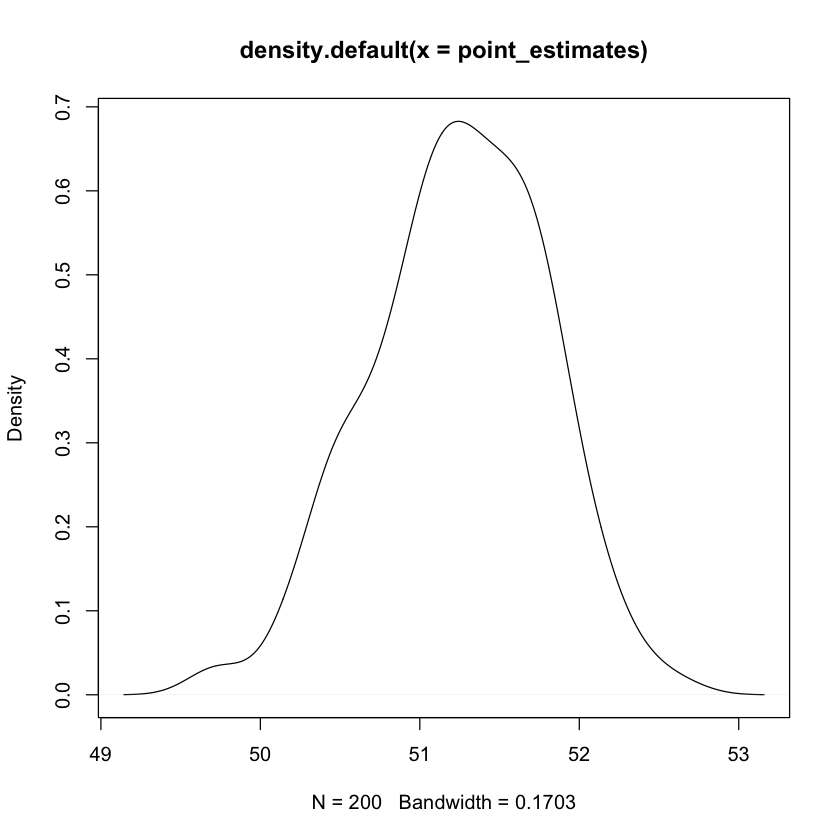

In [6]:
set.seed(12)
point_estimates <- c()    # Create an empty vector to hold results

num_samples <- 200        # Initialize number of samples to take

 # Draw 200 samples and make 200 point estimates
for (x in 1:num_samples){         
    sample <- sample(population_ages, size=1000)
    point_estimates <- c(point_estimates, mean(sample))
}

plot(density(point_estimates))  # Plot the sampling distribution

The sampling distribution exhibits a nearly normal shape, showing considerably reduced skewness compared to the original distribution.

In [7]:
skewness(point_estimates)

[1] -0.2609927

Furthermore, the mean of the sampling distribution converges towards the actual population mean:

In [8]:
mean(point_estimates)

mean(point_estimates)-true_mean    # Difference between true mean and sample means

[1] 51.24153

[1] 0.02269267

Increasing the number of samples improves the accuracy of our estimation for the population parameter.

## Confidence Intervals

A point estimate provides an approximate value for a population parameter, such as the mean, but it is subject to uncertainty and obtaining multiple samples for better estimates might not be practical. To address this uncertainty, a confidence interval is used, which represents a range of values around the point estimate that is likely to encompass the true population parameter with a predetermined confidence level.

For instance, if we desire a 95% confidence level, the confidence interval will be constructed to have a 95% probability of containing the true population parameter. Higher confidence levels result in wider confidence intervals.

To calculate a confidence interval, you start with the point estimate and then add and subtract a margin of error, determined by the desired confidence level, data variability, and sample size. The method of calculating the margin of error depends on whether the population standard deviation is known or not.

If the population standard deviation (σ) is known, the margin of error can be expressed as:

$$z * \frac{\sigma}{\sqrt{n}}$$

Here, z represents the z-critical value, which indicates the number of standard deviations from the mean of a normal distribution to capture the data proportion associated with the desired confidence level. For example, a z-critical value of 2 is commonly used for a 95% confidence interval, signifying that about 95% of the data in a normal distribution lies within 2 standard deviations from the mean (though more precise z-critical values can be obtained using qnorm()).

Now, let's proceed to calculate a 95% confidence interval for our mean point estimate using R.

In [9]:
set.seed(10)
sample_size <- 1000
sample_ages <- sample(population_ages, size=sample_size)  # Take a sample of 1000 ages

sample_mean <- mean(sample_ages)  # Get the sample mean

z_critical <- qnorm(0.975)        # Get the z-critical value*

print("z-critical value:")
print(z_critical)                 # Check the z-critical value

pop_stdev <- sd(population_ages)  # Get the population standard deviation

margin_of_error <- z_critical * (pop_stdev / sqrt(sample_size)) # Get margin of error

confidence_interval  <- c(sample_mean - margin_of_error,  # Calculate the the interval
                          sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval   )     # Check the interval

[1] "z-critical value:"
[1] 1.959964
[1] "Confidence interval:"
[1] 50.07138 52.28907


*Please take note that we utilize qnorm(0.975) to obtain the desired z critical value instead of qnorm(0.95) due to the distribution having two tails. As observed, the confidence interval we calculated successfully encompasses the true population mean of 51.2188.*

Now, let's generate multiple confidence intervals and visualize them to gain a clearer understanding of what it entails to "capture" the true mean.

In [10]:
set.seed(12)
sample_size <- 1000

intervals <- c()  # Create and store 25 intervals
 
for (sample in 1:25){
sample_ages <- sample(population_ages, size=sample_size)  # Take a sample of 1000 ages

sample_mean <- mean(sample_ages)  # Get the sample mean

z_critical <- qnorm(0.975)        # Get the z-critical value*

pop_stdev <- sd(population_ages)  # Get the population standard deviation

margin_of_error <- z_critical * (pop_stdev / sqrt(sample_size)) # Calculate margin of error

confidence_interval  <- c(sample_mean - margin_of_error,  # Calculate the the interval
                          sample_mean + margin_of_error)  

intervals <- c(intervals, confidence_interval)    
}

interval_df <- data.frame(t(matrix(intervals,2,25)))  # Store intervals as data frame

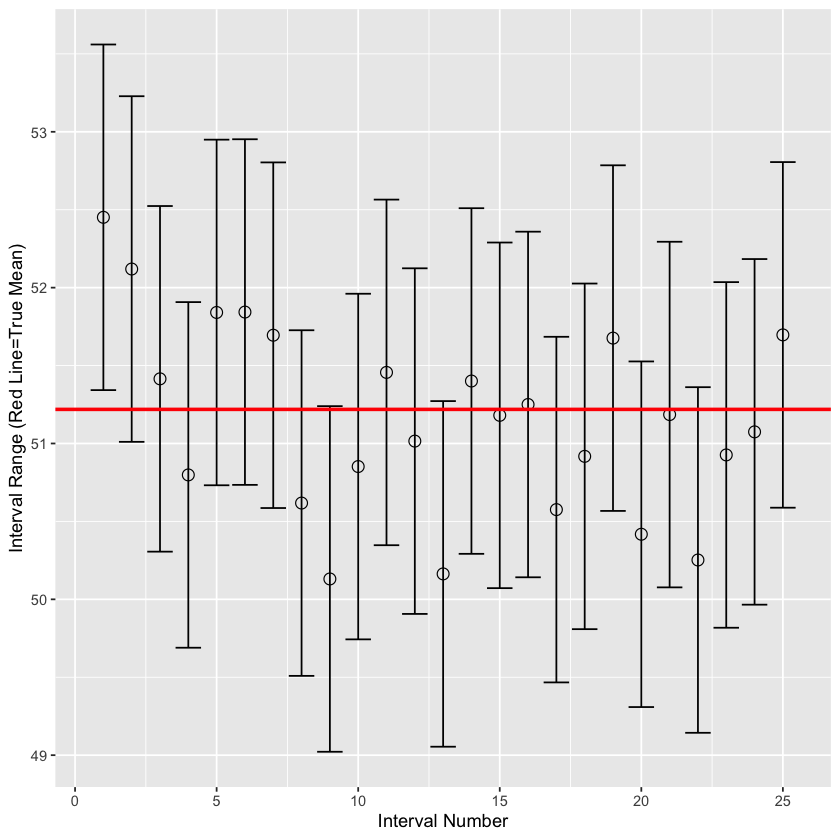

In [11]:
library(ggplot2)


# Plot confidence intervals and show the true mean

my_plot <- ggplot(data=interval_df, aes(x=1:nrow(interval_df))) +
                geom_errorbar(aes(ymax = X2, ymin = X1)) +
                geom_point(aes(y=rowMeans(interval_df)), shape=1, size=3) +
                geom_abline(intercept=true_mean, slope=0,color="red",lwd=1) +
                ylab("Interval Range (Red Line=True Mean)") +
                xlab("Interval Number")

my_plot

In the plot above, it is noticeable that almost all of the 95% confidence intervals overlap with the red line representing the true mean. This outcome is expected since a 95% confidence interval is designed to capture the true mean 95% of the time, leaving a 5% chance for the interval to miss the true mean.

When the standard deviation of the population is unknown, the sample standard deviation serves as a substitute when constructing confidence intervals. However, due to the potential mismatch between the sample standard deviation and the population parameter, the interval may contain more error in such cases. To address this issue, a t-critical value is utilized instead of the z-critical value. The t-critical value is derived from the t-distribution, which is similar to the normal distribution but widens as the sample size decreases. In R, the t-distribution is incorporated with functions such as rt(), qt(), pt(), and dt().

To demonstrate this, let's take a new, smaller sample and construct a confidence interval without knowing the population standard deviation, utilizing the t-distribution.

In [12]:
set.seed(12)
smaller_sample <- sample(population_ages, size=25)  

sample_mean <- mean(smaller_sample) # Get the sample mean

t_critical <- qt(0.975, df=24)      # Get the t-critical value *

print("t-critical value:")
print(t_critical)                   # Check the t-critical value

sample_stdev <- sd(smaller_sample)  # Get the sample standard deviation

margin_of_error <- t_critical * (sample_stdev / sqrt(25)) # Calculate margin of error

confidence_interval  <- c(sample_mean - margin_of_error,  # Calculate the the interval
                          sample_mean + margin_of_error) 

print("Confidence interval:")
print(confidence_interval)

[1] "t-critical value:"
[1] 2.063899
[1] "Confidence interval:"
[1] 44.17988 62.33381


*Please note that when employing the t-distribution, it is necessary to specify the degrees of freedom (df). In this scenario, the degrees of freedom are obtained by subtracting 1 from the sample size. In cases where the sample size is substantial, the t-distribution converges towards the normal distribution.*

Observe that the t-critical value exceeds the z-critical value utilized for a 95% confidence interval. This adjustment allows the confidence interval to encompass a wider range to compensate for the variability arising from substituting the sample standard deviation for the population standard deviation. Consequently, the confidence interval becomes considerably wider, indicating a larger margin of error.

When dealing with a sizable sample, the t-critical value approaches the z-critical value, resulting in minimal disparity between utilizing the normal distribution or the t-distribution.

## Calculate the critical values for a sample size of 1000:
- Using the qnorm function to find the critical value for a standard normal distribution at a confidence level of 95%.
- Utilizing the qt function to determine the critical value from a t-distribution with 999 degrees of freedom at a confidence level of 95%.

In [13]:
qnorm(0.975)                
qt(0.975, df= 999)

[1] 1.959964

[1] 1.962341

Instead of manually calculating a confidence interval for a mean point estimate, you can leverage the t.test() function in R to perform the calculation automatically.

In [14]:
t.test(smaller_sample)


	One Sample t-test

data:  smaller_sample
t = 12.109, df = 24, p-value = 1.036e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 44.17988 62.33381
sample estimates:
mean of x 
 53.25685 


Observe that the test output provides a 95% confidence interval, which aligns with the calculated result (we will delve deeper into t.test() in the next lesson).

We can also construct a confidence interval for a point estimate of a population proportion. In this scenario, the margin of error is given by:

$$z * \sqrt{\frac{p(1-p)}{n}}$$

Here, z represents the z-critical value for our specified confidence level, p is the point estimate of the population proportion, and n denotes the sample size. Now, let's compute a 95% confidence interval for the Hispanic population based on the earlier calculated sample proportion (0.204).

In [15]:
z_critical <- qnorm(0.975)    # Record z-critical value

p <- 0.204                    # Point estimate of proportion

n <- 1000                     # Sample size

margin_of_error <- z_critical * sqrt((p*(1-p))/n)

confidence_interval  <- c(p - margin_of_error,  # Calculate the the interval
                          p + margin_of_error) 

confidence_interval

[1] 0.1790242 0.2289758

Once more, the confidence interval successfully encompassed the true population parameter of 0.2.

Similar to obtaining a confidence interval for the mean, you have the option to utilize a built-in R function instead of manually calculating a confidence interval for a population proportion. In this scenario, the prop.test() function is employed for this purpose.

In [16]:
prop.test(x=204,      # Number of observations
          n=1000)     # Total number of samples


	1-sample proportions test with continuity correction

data:  204 out of 1000, null probability 0.5
X-squared = 349.28, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.1797036 0.2306071
sample estimates:
    p 
0.204 


In the provided output, it is important to observe that the 95% confidence interval mentioned approximately aligns with the one we computed.

## Conclusion

Sampling and estimating population parameters are fundamental aspects of inference, offering a potent method for analysis. By employing point estimates alongside error margins, we can construct confidence intervals that accurately encompass the actual population parameter with a high level of certainty. R provides convenient built-in probability distribution and test functions, simplifying the process of calculating confidence intervals efficiently.

In the upcoming lesson, we will delve deeper into these concepts, exploring statistical hypothesis testing and the t-test for further insights and applications.

## Exercises

In order to complete the exercises, please fill in the code boxes as per the instructions provided and then execute the code.

### Exercise #1
Follow these steps to estimate the population mean of the "Age" column in the Titanic dataset using a sample of 40 passengers and calculate the difference between the sample mean and the true mean:

- Load the Titanic dataset.
- Take a sample of 40 passengers.
- Use the mean() function on the "Age" column with the argument na.rm = TRUE to handle NA values.
- Calculate the sample mean.
- Calculate the true mean of the "Age" column in the entire population.
- Find the difference between the sample mean and the true mean to determine the estimate's accuracy.

In [18]:
set.seed(12)
titanic_train <- read.csv("../data/titanic/train.csv")

age_sample <- "Your Code Here"

point_estimate <- "Your Code Here"

#Print sample mean
print("Point Estimate")
print(point_estimate)

# Print difference between sample mean and true mean
print("Mean Difference")
print("Your Code Here")

[1] "Point Estimate"
[1] "Your Code Here"
[1] "Mean Difference"
[1] "Your Code Here"


### Exercise #2
Determine the margin of error for the point estimate of a 95% confidence interval using the t-distribution. It is important to consider that the sample size used in calculating the point estimate is 40, reduced by the number of NA values present in the sample.

In [19]:
true_sample_size <- 40 - "Your Code Here"

t_critical <- qt("Your Code Here", df = true_sample_size)

margin_of_error <- t_critical * "Your Code Here"

print("Margin of Error")
print(margin_of_error)

ERROR: Error in 40 - "Your Code Here": non-numeric argument to binary operator


### Exercise #3
Compute and display a 95% confidence interval for the mean age, utilizing the point estimate and margin of error previously calculated. Ensure that your confidence interval matches the one generated by the t.test(age_sample) function call.

In [20]:
print("Confidence Interval")
print(c("Your Code Here!",
        "Your Code Here!"))


t.test(age_sample)

[1] "Confidence Interval"
[1] "Your Code Here!" "Your Code Here!"


Warning message in mean.default(x):
“argument is not numeric or logical: returning NA”
Warning message in var(x):
“NAs introduced by coercion”


ERROR: Error in t.test.default(age_sample): not enough 'x' observations


## Exercise Solutions

In [22]:
# 1 

set.seed(12)
titanic_train <- read.csv("../data/titanic/train.csv")

age_sample <- sample(titanic_train$Age, 40)

point_estimate <- mean(age_sample, na.rm=TRUE)

#Print sample mean
print("Point Estimate")
print(point_estimate)

# Print difference between sample mean and true mean
print("Mean Difference")
print(mean(titanic_train$Age, na.rm=TRUE) - point_estimate)


# 2 

t_critical <- qt(0.975, df = 31)

margin_of_error <- t_critical * (sd(age_sample, na.rm=T) / sqrt(32))

print("Margin of Error")
print(margin_of_error)

# 3

print("Confidence Interval")
print(c(point_estimate-margin_of_error,
       point_estimate+margin_of_error))


t.test(age_sample)

[1] "Point Estimate"
[1] 31.87879
[1] "Mean Difference"
[1] -2.17967
[1] "Margin of Error"
[1] 4.971116
[1] "Confidence Interval"
[1] 26.90767 36.84990



	One Sample t-test

data:  age_sample
t = 13.282, df = 32, p-value = 1.445e-14
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 26.98976 36.76781
sample estimates:
mean of x 
 31.87879 
